# 2022-08-10 


In [9]:
# 그래디언트 부스트 분류기 
from sklearn.ensemble import GradientBoostingClassifier # 내부 약 분류기로 의사결정회귀나무 사용

# 분류 모델 준비 
model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0) # {약 분류기 갯수: 100개, 약 분류기 깊이: 2, 랜덤시드:0}

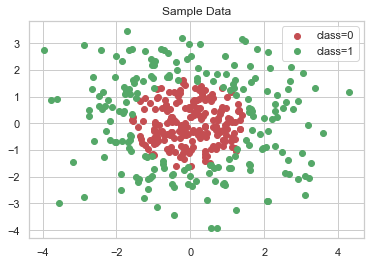

CPU times: total: 125 ms
Wall time: 123 ms


In [52]:
%%time 
%matplotlib inline 

# 데이터셋 호출 
from sklearn.datasets import make_gaussian_quantiles

# 임의 생성 데이터셋
x1, y1 = make_gaussian_quantiles(cov=2.0, random_state=0, n_samples=200, n_features=2, n_classes=2, shuffle=True)
x2, y2 = make_gaussian_quantiles(cov=2.0, random_state=1, n_samples=200, n_features=2, n_classes=2, shuffle=True)

X = np.concatenate([x1, x2], axis=0) ; y = np.concatenate([y1, y2], axis=0) 

idx_0 = np.where(y==0); idx_1 = np.where(y==1)

plt.scatter(X[idx_0, 0], X[idx_0,1], c='r', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='g', label='class=1')
plt.legend()
plt.title('Sample Data')
plt.show() 

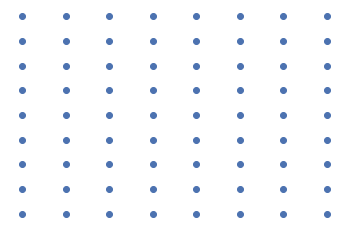

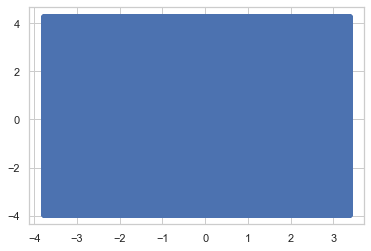

In [61]:
# 모델 성능 검증에 쓸 데이터셋 형태 둘러보기 
x1_min, x1_max = x1[:,0].min(), x1[:,0].max() 
x2_min, x2_max = x2[:,0].min(), x2[:,0].max() 

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 1), np.arange(x2_min, x2_max, 1))
plt.scatter(xx1, xx2)
plt.axis('off')
plt.show() 

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
plt.scatter(xx1, xx2)

In [63]:
%%time 

# 그래디언트부스트 분류기, 훈련용 데이터 학습 
fitted_model = model_grad.fit(X, y)

CPU times: total: 46.9 ms
Wall time: 37.1 ms


In [79]:
# 그래디언트부스트 분류기, 새 데이터셋 예측 
xx_predict = np.c_[xx1.ravel(), xx2.ravel()]
Y = fitted_model.predict(xx_predict).reshape(xx1.shape)

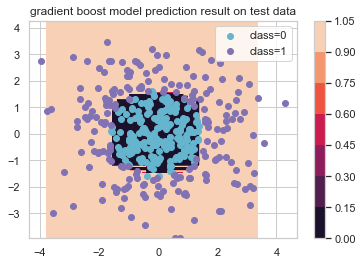

In [87]:
cs = plt.contourf(xx1, xx2, Y)
plt.colorbar(cs)

idx_0 = np.where(y==0); idx_1 = np.where(y==1)
plt.scatter(X[idx_0, 0], X[idx_0,1], c='c', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='m', label='class=1')
plt.legend()
plt.title('gradient boost model prediction result on test data')
plt.show() 

#### 손실 계속 줄여가며 모델 업데이트하는 그래디언트부스트 모델이
#### 상당히 정확하게 예측해냈음을 확인할 수 있었다. 

In [117]:
print(f'앙상블 weak learner 갯수: {len(fitted_model.estimators_)}')
print(fitted_model.estimators_[0][0]) # 약 분류기는 모두 의사결정회귀나무다. 

def plot_result(model,x1, x2, X, y) : 
    x1_min, x1_max = x1[:,0].min(), x1[:,0].max() 
    x2_min, x2_max = x2[:,0].min(), x2[:,0].max() 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    
    fitted_model = model.fit(X, y)
    xx_predict = np.c_[xx1.ravel(), xx2.ravel()]
    Y = fitted_model.predict(xx_predict).reshape(xx1.shape)

    cs = plt.contourf(xx1, xx2, Y)
    plt.colorbar(cs)

    idx_0 = np.where(y==0); idx_1 = np.where(y==1)
    plt.scatter(X[idx_0, 0], X[idx_0,1], c='c', label='class=0')
    plt.scatter(X[idx_1, 0], X[idx_1,1], c='m', label='class=1')
    plt.legend()
    plt.title('gradient boost model prediction result on test data')
    plt.show() 

앙상블 weak learner 갯수: 100
DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      random_state=RandomState(MT19937) at 0x1F7F3AD3440)


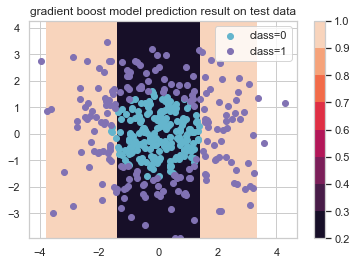

In [121]:
# 첫번째 개별 분류기 분류결과 
plot_result(fitted_model.estimators_[0][0],x1,x2, X, y)


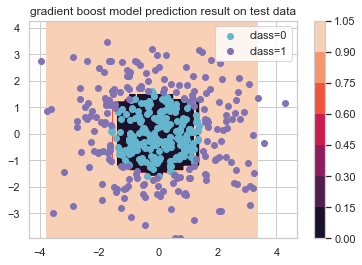

In [130]:
# 에이다부스트모델 결과와 비교 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adamodel = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100)
fitted_ada = adamodel.fit(X, y)

plot_result(adamodel, x1, x2, X, y)

### 그래디언트 부스팅 - XGBoost 라이브러리 

In [140]:
# xgboost: 그래디언트부스트 알고리즘을 병렬처리 환경에서 사용할 수 있도록 만든 라이브러리. 즉, 작업을 병렬로 처리하는 그래디언트부스트 알고리즘. 

import xgboost 

# xgboost 모델 
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=1, random_state=0)

In [141]:
%%time 

model_xgb.fit(X,y)

CPU times: total: 266 ms
Wall time: 83.7 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

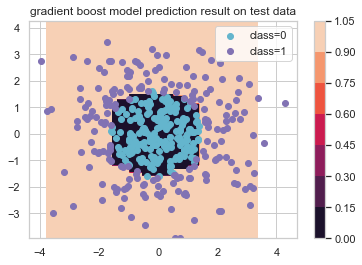

In [142]:
plot_result(model_xgb, x1, x2, X, y)

### 그래디언트 부스팅 - LightGBM 라이브러리 

In [147]:
import lightgbm

model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=1, random_state=0)

In [148]:
%%time 
model_lgbm.fit(X, y)

CPU times: total: 0 ns
Wall time: 11.1 ms


LGBMClassifier(max_depth=1, random_state=0)

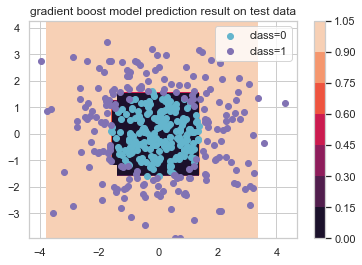

In [149]:
plot_result(model_lgbm, x1, x2, X, y)